In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data
(x_data,y_data),(t_x_data,t_y_data) = load_data()
x_data=x_data.reshape(-1,28,28,1)/255.0
t_x,tt_x,t_y,tt_y = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [2]:
m=keras.Sequential()
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'
                          ,input_shape=(28,28,1)))
m.add(keras.layers.MaxPooling2D(2))
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(keras.layers.MaxPooling2D(2))

In [3]:
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.4))
m.add(keras.layers.Dense(10,activation='softmax'))
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

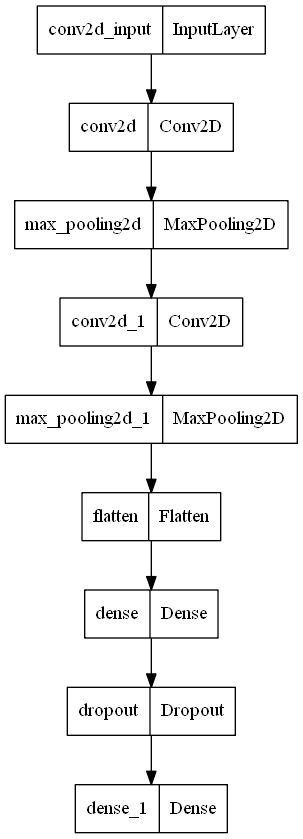

In [4]:
keras.utils.plot_model(m)

In [6]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

In [7]:
m= keras.models.load_model('best-cnn-model.h5')

In [8]:
m.layers

In [11]:
conv=m.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [13]:
w = conv.weights[0].numpy()
w.mean(), w.std()

(-0.025312617, 0.25047907)

In [14]:
m.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [15]:
cov_act1=keras.Model(m.input, m.layers[0].output)

In [16]:
(x_data,y_data),(t_x_data,t_y_data) = keras.datasets.fashion_mnist.load_data()
x_data=x_data.reshape(-1,28,28,1)/255.0

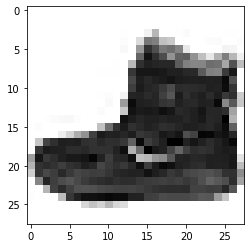

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_data[0],cmap='gray_r')

In [19]:
f_map = cov_cat1.predict(in_data[0:1])
f_map

NameError: name 'cov_cat1' is not defined